<a href="https://colab.research.google.com/github/mauricio201922/DataScience/blob/main/AulaFive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatísticas

### Descrevendo um único conjunto de dados

##### Para descrevermos grandes volumes de dados lançamos mão das ferramentas estatísticas visto que analisar os dados brutos se torna impraticável Por ex.: para analisarmos a quantidades de amigos em uma rede social, usamos o histograma

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
import random
import math

In [9]:
num_friends = [100, 49, 41, 40, 25, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4,
  4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 10, 11, 11, 12, 12,
  15, 15, 15, 18, 20, 20]
daily_min = [1, 39, 37, 35, 28, 7, 9, 8, 7, 8, 10, 11, 12, 9, 13, 15, 14,
  14, 17, 16, 15, 19, 16, 21, 17, 19, 22, 18, 21, 20, 24, 23, 22, 25,
  25, 27, 29, 28, 30, 32]


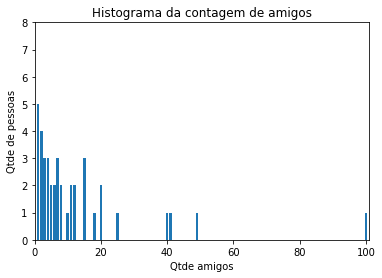

In [13]:
# Variavel recebe o contador dos amigos
friend_counts = Counter(num_friends)
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends

# Criando um grafico de barra, xs é o valor maximo para o grafico de barra
# o ys tem o tamanho dos contadores dos amigos com junçao com xs
plt.bar(xs, ys)
plt.axis([0, 101, 0, 8]) # cria largura maxima para x e y sendo [0, 101] = x [0, 8] = y
plt.title("Histograma da contagem de amigos") # cria titulos
plt.xlabel("Qtde amigos") # titulos do eixo x
plt.ylabel("Qtde de pessoas") # titulos do eixo y
plt.show() # mostra o grafico

##### Algumas estatísticas básicas: tamanho da base, maior quantidade de amigos, menor quantidade deamigos, etc.


In [14]:
print("Tamanho da base:", len(num_friends))
print("Maior quantidade de amigos", max(num_friends))
print("Menor quantidade de amigos", min(num_friends))

Tamanho da base: 40
Maior quantidade de amigos 100
Menor quantidade de amigos 1


In [15]:
sorted_num_friends = sorted(num_friends)
print("Menor qtde de amigos =", sorted_num_friends[0])
print("Decima menor qtde de amigos =", sorted_num_friends[9])
print("Segunda maior qtde de amigos =", sorted_num_friends[-2])

Menor qtde de amigos = 1
Decima menor qtde de amigos = 3
Segunda maior qtde de amigos = 49


### Têndencia Central
##### Normalmente queremos ter uma noção de onde os nossos dados estão centrados.


### Média
##### Comumente usaremos a média que é a soma dos valores de uma base de dados dividido pela sua contagem.

In [16]:
def media(x):
  return sum(x)/len(x)
print("A media de amigos =", media(num_friends))

A media de amigos = 12.675


### Mediana
##### Também podemos usar a mediana, que é o valor mais ao centro da base de dados considerando que ela esteja ordenada. Caso a quantidade de instâncias em uma base seja um número par, a mediana é obtida pela média dos dois valores mais centrais.

##### Por exemplo, se temos cinco instâncias de dados em um vetor ordenado x, a mediana é x [5 // 2] ou x [2]. Se tivermos seis pontos de dados então a mediana é obtida pela média de x [2] (o terceiro ponto) e x [3] (o quarto ponto)

In [17]:
def mediana(v):
  n = len(v)
  v_ordenado = sorted(v)
  i_centro = n // 2
  if n % 2 == 1:
    return v_ordenado(i_centro)
  else:
    i_centro_2 = i_centro - 1
    return (v_ordenado[i_centro_2] + v_ordenado[i_centro]) / 2

print("A mediana de amigos =", mediana(num_friends))


A mediana de amigos = 7.0


##### Claramente, a média é mais simples de calcular e varia conforme nossos dados são alterados. Se tivermos n pontos de dados e um deles aumentar em alguma quantidade pequena, então necessariamente a média aumentará. (Isso torna a média passível de todo tipo de truques de cálculo.)

##### A mediana, por outro lado, não sofre com valores discrepantes uma vez que considera o valor mais ao centro e é por isso que, para encontrar a mediana, temos que ordenar nossos dados.

##### A média é muito sensível a valores discrepantes em nossos dados. Se nosso usuário mais amigável tivesse 200 amigos (em vez de 100), a média subiria, enquanto a mediana permaneceria a mesma. Se os valores discrepantes forem, provavelmente, dados incorretos (ou, de outra forma, não representativos de qualquer fenômeno que estamos tentando entender), a média poderá, às vezes, nos fornecer uma imagem enganosa. Por exemplo, a história é frequentemente contada que em meados da década de 1980, o curso da Universidade da Carolina do Norte com o maior salário médio inicial era a geografia, principalmente por causa da estrela da NBA (e outlier) Michael Jordan.


### Quantil
##### Uma generalização da mediana é o quantil, que representa o valor menor que um certo percentil dos dados. (A mediana representa o valor menor que 50% dos dados.)


### Percentil
##### Podemos conceituar percentil como sendo a medida que divide a amostra em 100 partes iguais.


##### Exemplo: 
#####P10 indica que 10% dos dados estão ordenados à sua esquerda e 90% à direita de P10.
#####P20 indica que 20% dos dados estão ordenados à sua esquerda e 80% à sua direita.


In [18]:
def quantile(x, p):
  """returns the pth-percentile value in x"""
  p_index = int(p * len(x))
  return sorted(x)[p_index]
#sorted(num_friends)


In [19]:
print(quantile(num_friends, 0.10)) # 1
print(quantile(num_friends, 0.25)) # 3
print(quantile(num_friends, 0.75)) # 15
print(quantile(num_friends, 0.90)) # 40

1
3
15
40


### Moda
##### É o valor mais comum, aquele que mais se repete em uma base de dados.


In [20]:
def mode(x):
  """returns a list, might be more than one mode"""
  counts = Counter(x)
  max_count = max(counts.values())
  return [x_i for x_i, count in counts.items()
    if count == max_count]

print(mode(num_friends)) # 1


[1]


# Dispersão

##### Dispersão refere-se a medidas de quão espalhados estão os nossos dados. Normalmente, são estatísticas para as quais valores próximos de zero significam pouco espalhados e para os quais grandes valores
significam muito espalhados. 

### Intervalo

##### Por exemplo, uma medida muito simples é o intervalo, que é apenas a diferença entre os elementos maiores e menores:


In [21]:
def data_range(x):
  return max(x) - min(x)
data_range(num_friends) # 99

99

##### O intervalo é precisamente zero quando max e min são iguais, o que só pode acontecer se os elementos de x forem todos iguais, o que significa que os dados são tão agrupados (não dispersos) quanto possível. Por outro lado, se o intervalo for grande, o máximo será muito maior que o mínimo e os dados serão mais dispersos.

##### Assim como a mediana, o intervalo não depende realmente de todo o conjunto de dados. Um conjunto de dados cujos pontos são todos 0 ou 100 tem o mesmo intervalo que um conjunto de dados cujos valores são 0, 100 e muitos 50s. Mas parece que o primeiro conjunto de dados “deveria” estar mais espalhado.


### Variância

##### Uma medida mais complexa de dispersão é a variância, que é calculada como:

In [22]:
def de_mean(x):
  x_bar = media(x)
  return [x_i - x_bar for x_i in x]
def sum_of_squares(x):
  return sum([x_i * x_i for x_i in x])
def variance(x):
  n = len(x)
  deviations = de_mean(x)
  return sum_of_squares(deviations) / (n - 1)

In [23]:
print("Variância No amigos =", variance(num_friends))
print("Variância Tempo Online =", variance(daily_min))

Variância No amigos = 328.2762820512823
Variância Tempo Online = 80.22499999999998


##### Parece que é quase o desvio médio da média, exceto pelo fato de estarmos dividindo por n-1 em vez de n. De fato, quando estamos lidando com uma amostra de uma população maior, x_bar é apenas uma estimativa da média real e é por isso que dividimos por n-1 em vez de n.


### Desvio Padrão

##### Quaisquer que sejam as unidades em que nossos dados estão, todas as nossas medidas de tendência central como a média, a mediana, etc. estão nessa mesma unidade. O intervalo também está nessa mesma unidade mas a variância tem unidades que são o quadrado das unidades originais (por ex.: "amigos ao quadrado"). Por isso gostamos de olhar para o desvio padrão:


In [24]:
def desvio_padrao(x):
  return math.sqrt(variance(x))
print(desvio_padrao(num_friends))


18.118396232870126


### Atividade:

##### Dada a matriz a seguir que representa as médias bimestrais de 4 alunos, calcule a variância e o desvio padrão, considerando todas as notas.


In [25]:
import numpy as np


In [26]:
notas = [[5, 8, 10, 7],
         [8, 6, 6, 10],
         [10, 9, 5, 10],
         [8, 10, 9, 4]]

print("Notas flatted = ", np.array(notas).flatten())
print("Variância = ", variance(np.array(notas).flatten()))
print("Desvio padrão = ",desvio_padrao(np.array(notas).flatten()))


Notas flatted =  [ 5  8 10  7  8  6  6 10 10  9  5 10  8 10  9  4]
Variância =  4.295833333333333
Desvio padrão =  2.0726392192886185


# Correlação

##### A correlação mede o relacionamento entre duas variáveis ou métricas a fim de se obter alguma informação sobre os dados. Por exemplo, qual a relação entre o tempo despendido acessando um determinada rede social e o número de amigos?

### Covariância

##### Primeiro analisaremos a covariância, o análogo pareado da variância. Enquanto a variância mede como uma única variável se desvia de sua média, a covariância mede como duas variáveis variam em conjunto a partir de suas médias


In [27]:
def dot(v, w):
  return sum(v_i * w_i
    for v_i, w_i in zip(v, w))

def covariance(x, y):
  n = len(x)
  return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_min)

44.7173076923077

#####Lembre-se de que a função "dot" soma os produtos dos pares correspondentes de elementos. Quando os elementos correspondentes de x e y estão ambos acima de suas médias ou ambos abaixo de suas médias, um úmero positivo entra na soma. Quando um está acima de sua média e o outro  baixo, um número negativo entra na soma. Assim:

##### Uma covariância positiva “grande” significa que x tende a ser grande quando y é grande e pequeno quando y é pequeno

##### Uma covariância negativa “grande” significa o oposto - que x tende a ser pequeno quando y é grande e
vice-versa

##### Uma covariância próxima de zero significa que não existe tal relação


### Correlação

##### No entanto, este número pode ser difícil de interpretar, por isso é mais comum olharmos para a correlação que divide a covariância de duas variáveis pelos desvios padrão de ambas as variáveis


In [28]:
def correlation(x, y):
  stdev_x = desvio_padrao(x)
  stdev_y = desvio_padrao(y)
  if stdev_x > 0 and stdev_y > 0:
    return covariance(x, y) / stdev_x / stdev_y
  else:
    return 0 # if no variation, correlation is zero

correlation(num_friends, daily_min)


0.2755503912677958

##### A correlação não possui unidade e está sempre entre -1 (anti-correlação perfeita) e 1 (correlação perfeita). Um número como 0,27 representa uma correlação positiva relativamente fraca. No entanto, uma coisa que negligenciamos foi examinar nossos dados, abaixo um gráfico de espalhamento da relação entre quantidade de amigos e minutos por dia com um "outlier".


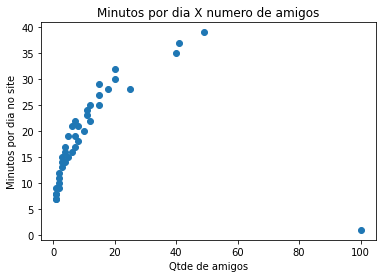

In [29]:
plt.scatter(num_friends, daily_min)
plt.title("Minutos por dia X numero de amigos")
plt.xlabel("Qtde de amigos")
plt.ylabel("Minutos por dia no site")
plt.show()

##### A seguir, o mesmo gráfico anterior sem o outlier:

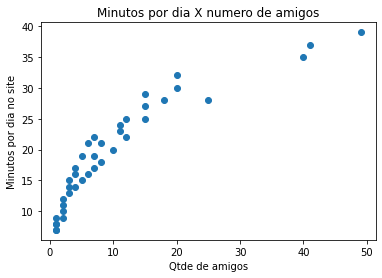

In [30]:
plt.scatter(num_friends[1:], daily_min[1:])
plt.title("Minutos por dia X numero de amigos")
plt.xlabel("Qtde de amigos")
plt.ylabel("Minutos por dia no site")
plt.show()

In [32]:
print("Correlação com outlier: ",correlation(num_friends, daily_min), " -> Baixa correlação")
print("Correlação sem outlier: ",correlation(num_friends[1:], daily_min[1:]), " -> Alta correlação")

Correlação com outlier:  0.2755503912677958  -> Baixa correlação
Correlação sem outlier:  0.9014335836717391  -> Alta correlação


# O Paradoxo de Simpson (https://youtu.be/sxYrzzy3cq8)

##### Uma surpresa não incomum ao analisar os dados é o Paradoxo de Simpson, no qual as correlações podem ser enganosas quando variáveis ocultas e confusas são ignoradas.
